# Image recognition with MNIST dataset

## Import MNIST dataset and visualize the dataset

In [1]:
# Import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load MNIST dataset from tensorflow
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
print('Train data shape:', X_train.shape, y_train.shape)
print('Test data shape:', X_test.shape, y_test.shape)

#Count number of unique train labels:
train_unique,train_counts = np.unique(y_train, return_counts=True)
print('Train labels:', dict(zip(train_unique,train_counts)))

#Count number of unique train labels:
test_unique,test_counts = np.unique(y_test, return_counts=True)
print('Test labels:', dict(zip(test_unique,test_counts)))

Train data shape: (60000, 28, 28) (60000,)
Test data shape: (10000, 28, 28) (10000,)
Train labels: {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Test labels: {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count plot for each digit from 0 to 9 in test dataset')

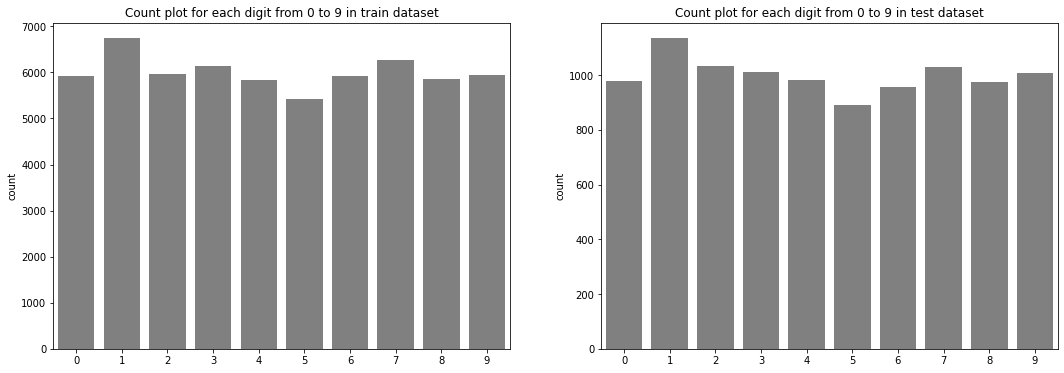

In [5]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (18, 6))
sns.countplot(y_train,color = 'grey',ax=ax1)
ax1.set_title('Count plot for each digit from 0 to 9 in train dataset')

sns.countplot(y_test,color = 'grey',ax=ax2)
ax2.set_title('Count plot for each digit from 0 to 9 in test dataset')

Test and train dataset has similar distribution and equally distributed

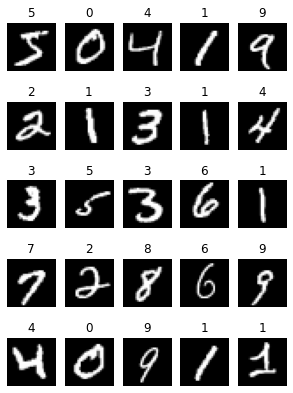

In [6]:
# Display the first 25 image in training dataset:
plt.figure(figsize=(5,7))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(X_train[i], cmap='gray') 
  plt.title(y_train[i])
  plt.axis('off')

In [7]:
#Check the type of train and test data    
print('Type of train data:',type(X_train))
print('Type of test data:',type(X_train))

Type of train data: <class 'numpy.ndarray'>
Type of test data: <class 'numpy.ndarray'>


In [8]:
#Number of digits in dataset:
n_labels = np.unique(y_train)
print('There are {} numbers to detect from the dataset'.format(len(n_labels)))
print(n_labels)

There are 10 numbers to detect from the dataset
[0 1 2 3 4 5 6 7 8 9]


## Transform data for NNs model

### One-hot encoding

Use tensorflow.keras.utils.to_categorical to converts a class vector (integers) to binary class matrix. Here, we will use it to convert our labels to a binary matrix with column values are 0 everywhere except for the index of the digit class.

In [9]:
from tensorflow.keras.utils import to_categorical

In [10]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [11]:
print('Train data shape after one-hot encoding:', y_train.shape)
print('Test data shape after one-hot encoding:', y_test.shape)

Train data shape after one-hot encoding: (60000, 10)
Test data shape after one-hot encoding: (10000, 10)


### Process images and normalization

In [12]:
X_train.shape

(60000, 28, 28)

The input data format for CNN in tensorflow is a four dimensional tensor of sample, rows, cols, channels for the color in RGB. However, MNIST data is a grayscale so the channel will have value of 1 instead. Thus, transform the train and test data based on that.

In [13]:
import tensorflow.keras as k

In [14]:
# Checking image data format:
k.backend.image_data_format()

'channels_last'

Channels_last: the input data format would be a four dimensional tensor: samples, rows, cols, channels. The outputs of the convolutional layers will also follow this pattern.

In [15]:
img_rows, img_cols=X_train.shape[1], X_train.shape[2]
#reshape the train and test data based on the format of the model:channels_first, or channels_last 
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
inpx = (img_rows, img_cols, 1)
 

In [16]:
X_train.shape

(60000, 28, 28, 1)

In [17]:
#Normalize the data from 0-255 to 0-1:
print('Data before normalization is ranged from {} to {}'.format(X_train[0].min(),X_train[0].max()))
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

Data before normalization is ranged from 0 to 255


In [18]:
print('Train data after normalization is ranged from {} to {}'.format(X_train[0].min(),X_train[0].max()))
print('Test data after normalization is ranged from {} to {}'.format(X_train[0].min(),X_train[0].max()))

Train data after normalization is ranged from 0.0 to 1.0
Test data after normalization is ranged from 0.0 to 1.0


## Convolutional neural networks

### Model architecture

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [20]:
#Specify callback criteria
early_stop = EarlyStopping(monitor='val_loss', mode='min',verbose = 1, patience = 25)


In [21]:
model = Sequential()

model.add(Conv2D(32, kernel_size = (3,3), activation ='relu', input_shape = inpx))
model.add(Conv2D(64, kernel_size = (3,3), activation ='relu'))

model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.5))

model.add(Flatten()) #Convert to 1-D tensor
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation = 'softmax')) #10 is number of labels: 0-9



model.compile(loss = 'CategoricalCrossentropy', optimizer='adam',
              metrics=['accuracy']) 

### Model summary and view

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 64)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 8, 8, 64)          0         
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 128)               524416    
                                                        

In [23]:
from keras.utils import plot_model

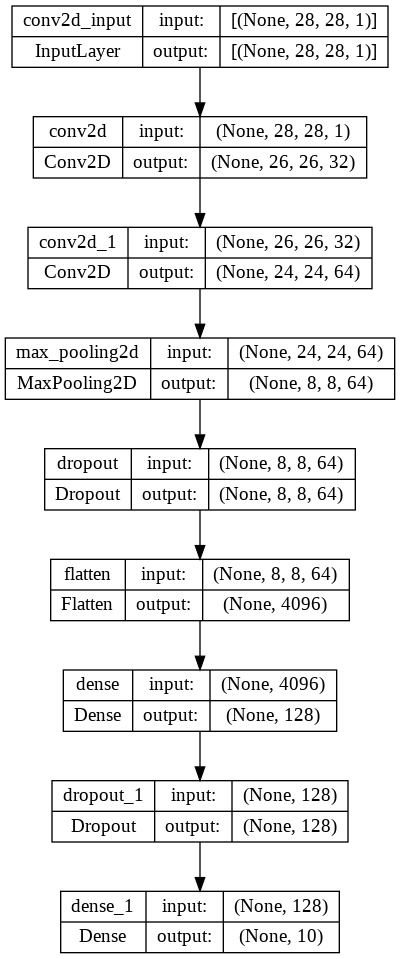

In [24]:
plot_model(model, to_file='cnn_model_mnist.png', show_shapes=True)

### Train the model

In [25]:
model.fit(X_train, y_train, epochs=10, batch_size= 128
          , validation_data = (X_test,y_test)
          , callbacks=[early_stop],verbose=1)

Epoch 1/10
469/469 [==============================] - 138s 293ms/step - loss: 0.2878 - accuracy: 0.9109 - val_loss: 0.0528 - val_accuracy: 0.9836
Epoch 2/10
469/469 [==============================] - 136s 290ms/step - loss: 0.1010 - accuracy: 0.9689 - val_loss: 0.0412 - val_accuracy: 0.9857
Epoch 3/10
469/469 [==============================] - 134s 287ms/step - loss: 0.0780 - accuracy: 0.9766 - val_loss: 0.0340 - val_accuracy: 0.9886
Epoch 4/10
469/469 [==============================] - 136s 289ms/step - loss: 0.0682 - accuracy: 0.9795 - val_loss: 0.0282 - val_accuracy: 0.9903
Epoch 5/10
469/469 [==============================] - 137s 293ms/step - loss: 0.0624 - accuracy: 0.9811 - val_loss: 0.0279 - val_accuracy: 0.9904
Epoch 6/10
469/469 [==============================] - 138s 295ms/step - loss: 0.0560 - accuracy: 0.9824 - val_loss: 0.0299 - val_accuracy: 0.9899
Epoch 7/10
469/469 [==============================] - 135s 289ms/step - loss: 0.0508 - accuracy: 0.9840 - val_loss: 0.0286 -

### Model evaluation 

In [27]:
#Compute the loss function
losses = pd.DataFrame(model.history.history)
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.287826,0.910933,0.052842,0.9836
1,0.101005,0.968950,0.041204,0.9857
2,0.077984,0.976600,0.033982,0.9886
3,0.068158,0.979483,0.028206,0.9903
4,0.062416,0.981150,0.027941,0.9904


Text(0, 0.5, 'Loss')

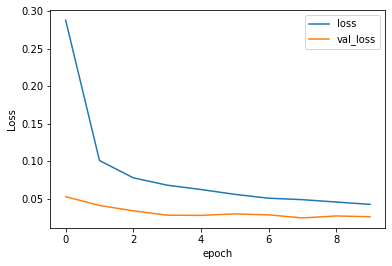

In [30]:
losses[['loss','val_loss']].plot()
plt.xlabel('epoch')
plt.ylabel('Loss')

In [31]:
# Compute predicted values based on the X_test:
y_predict = np.argmax(model.predict(X_test),axis=1)

313/313 [==============================] - 7s 21ms/step


In [32]:
#Convert one-hot encode to 1D vector of labels
y_test_list = np.argmax(y_test,axis=1)

In [33]:
print(y_predict)
print(y_test_list)

[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]


In [34]:
from sklearn.metrics import classification_report, confusion_matrix

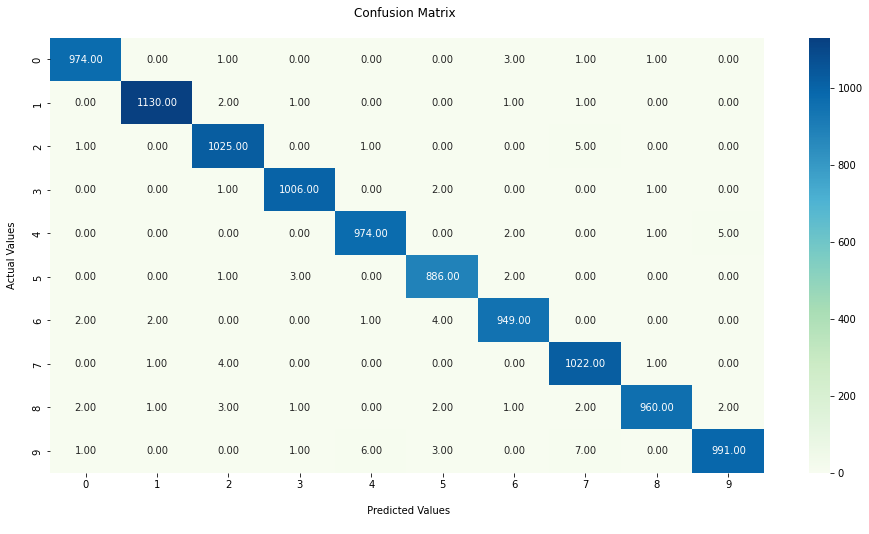

In [35]:
plt.figure(figsize=(16,8))
fx=sns.heatmap(confusion_matrix(y_test_list,y_predict), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(n_labels)
fx.yaxis.set_ticklabels(n_labels)
plt.show()

In [36]:
print(classification_report(y_test_list,y_predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      1.00      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



The accuracy of the model is 99% with good prediction for the handwriting of number 0,1,3,4

### Save the model

In [37]:
model.save('cnn_model_mnist')